In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
pricing = pd.read_csv("ParisHousing.csv")
pricing.head()


Saving ParisHousing.csv to ParisHousing.csv


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
pricing.shape

(10000, 17)

In [ ]:
pricing.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X = pricing.drop('price', axis=1)
y = pricing['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
predicted_prices = model.predict(X_test)
print(predicted_prices)
model.score(X,y)

[3587191.83225409 1690054.78904477 4818187.31525045 ... 6884194.25040841
 2259235.36612928 3206776.77442688]


0.9999995651733931

In [ ]:
def detect_outliers(pricing, column):
  A = pricing[column].quantile(0.25)
  B = pricing[column].quantile(0.75)
  C =   B-A
  lower = A - 1.5*C
  upper = B + 1.5*C
  outliers = pricing[(pricing[column]<lower) | (pricing[column]>upper)]
  return outliers

outliers = detect_outliers(pricing,'price')
print(f"no. of outliers in price: {outliers.shape[1]}")


no. of outliers in price: 17


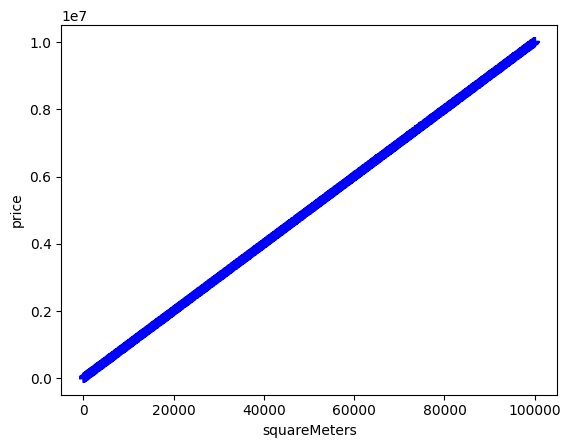

In [ ]:
%matplotlib inline
plt.scatter(pricing.squareMeters, pricing.price, color = 'b', marker='+',s=50)
plt.xlabel('squareMeters')
plt.ylabel('price')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  3686637.111836643
